---
# <div align="center"><font color='green'> COSC 2673/2793 | Machine Learning  </font></div>
## <div align="center"> <font color='green'> Assignment 1 **Prerak Soni S3787596**</font></div>
---

# Goal

Predict if a patient will develop sepsis in the period of their stay in the ICU. 


## Objective
- Providing an ultimate judgement of the final trained model
- Ensure the trained model has 
- Learn to train a model for classification problem
- Selecting the appropriate ML techniques and applying them to solve the problem at hand 


### Data Fields

| Column   Name                | Attribute/Target | Description                                                                                                                                                                                                  |
|------------------------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                           | N/A              | Unique number to represent patient ID                                                                                                                                                                        |
| PRG           | Attribute1       |  Plasma glucose
 |
| PL               | Attribute 2     |   Blood Work Result-1 (mu U/ml)                                                                                                                                                |
| PR              | Attribute 3      | Blood Pressure (mm Hg)    
|
| SK              | Attribute 4      | Blood Work Result-2 (mm) 
|
| TS             | Attribute 5      |     Blood Work Result-3 (mu U/ml)
|                                                                                               
| M11     | Attribute 6    |  Body mass index (weight in kg/(height in m)^2
|
| BD2             | Attribute 7     |   Blood Work Result-4 (mu U/ml)                                                                                                                                               |
| Age              | Attribute 8      |    patients age  (years)                                                                                                                                             |
| Insurance | N/A     | If a patient holds a valid insurance card
|
| Sepssis                 | Target           | Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise |



**The model is to predict if a patient has Sepssis or not, the data value is = Postive; Negative.**


First, ensure the data file is located within the Jupyter workspace. 
- If you are on the local machine copy the file (`Paitients_Files_Train.csv`) to your current folder.
- If you are on AWS you can upload the data to the notebook instance by clicking the `upload files` icon on the left sidebar.

# Loading the dataset & understanding the data we are working with

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

PaitientFileTrain = pd.read_csv('./Paitients_Files_Train.csv', delimiter=',')
PaitientFileTrain.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


Transform the target to boolean as it's easier to identify and quantify as it is a classification problem on whether or not the patient is positive or negative. True = positive, False = negative. 

In [2]:
print(set((PaitientFileTrain['Sepssis'])))

{'Positive', 'Negative'}


In [3]:
PaitientFileTrain['Sepssis'] = PaitientFileTrain['Sepssis'].map({'Positive': True,'Negative': False})
print(PaitientFileTrain['Sepssis'].dtypes)
PaitientFileTrain.head()

bool


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,True
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,False
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,True
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,False
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,True


In [4]:
print(set((PaitientFileTrain['Sepssis'])))

{False, True}


Usually we need to check if there are missing values and identify an action to handle them. Lets check if the data has any missing values. You can use the pandas `describe` to see if there are any columns with less number of items than others.

In [5]:
PaitientFileTrain.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> <span style="font-size:1em;">✔</span> **Observations:** 
> - We can see that the `min` row has only 0 in some attributes
> - We can see that the `Age` column has the range between 21 to 81.

The min value for all attributes PRG, PL, PR, SK, TS, M11 are 0 meaning that patients are missing either missing out on their medical tests or not completeing all the them. It could also mean the data collected didn't collect that specific attribute. In the case of this assignment I am choosing to ignore them as the dataset is a small size and every datapoint is valuable. 

# EDA

In [6]:
PaitientFileTrain.shape

(599, 11)

In [7]:
PaitientFileTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    bool   
dtypes: bool(1), float64(2), int64(7), object(1)
memory usage: 47.5+ KB


In [8]:
#Removing ID and Insurance as the ML techniques can be run smoothly without value errors.
del PaitientFileTrain['ID']
del PaitientFileTrain['Insurance']
PaitientFileTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRG      599 non-null    int64  
 1   PL       599 non-null    int64  
 2   PR       599 non-null    int64  
 3   SK       599 non-null    int64  
 4   TS       599 non-null    int64  
 5   M11      599 non-null    float64
 6   BD2      599 non-null    float64
 7   Age      599 non-null    int64  
 8   Sepssis  599 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 38.1 KB


Trying to see the reltionship between the attributes and the result using a scatterplot. It's very difficult to actually make any judgements using this EDA technique.

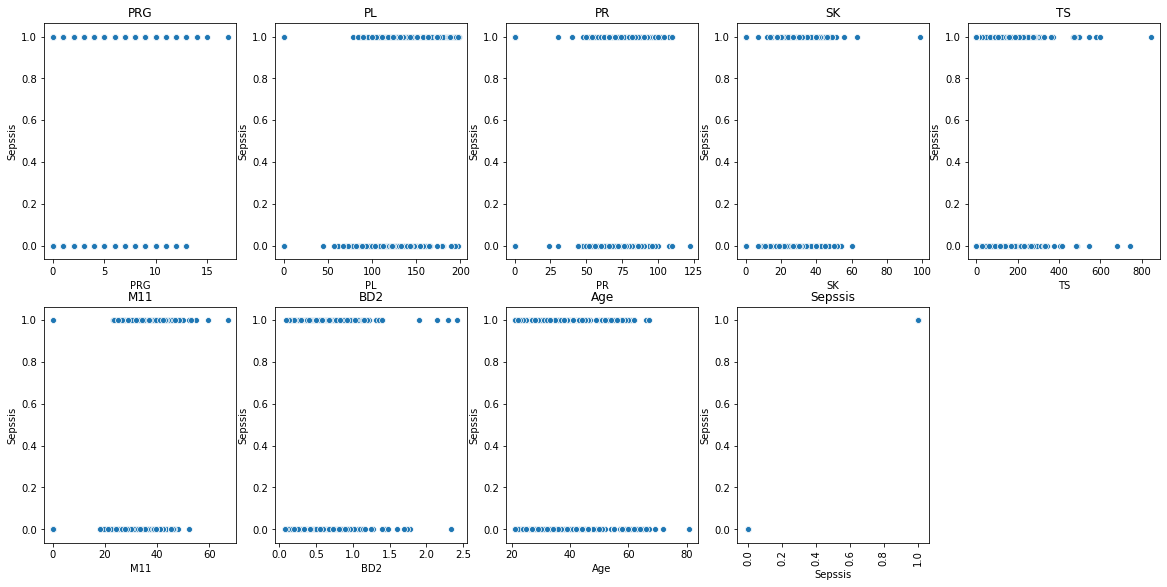

In [9]:
import seaborn as sns
plt.figure(figsize=(20,20))
for i, col in enumerate(PaitientFileTrain.columns):
    plt.subplot(4,5,i+1)
    sns.scatterplot(data=PaitientFileTrain, x=col, y='Sepssis')
    plt.title(col)

plt.xticks(rotation='vertical')
plt.show()

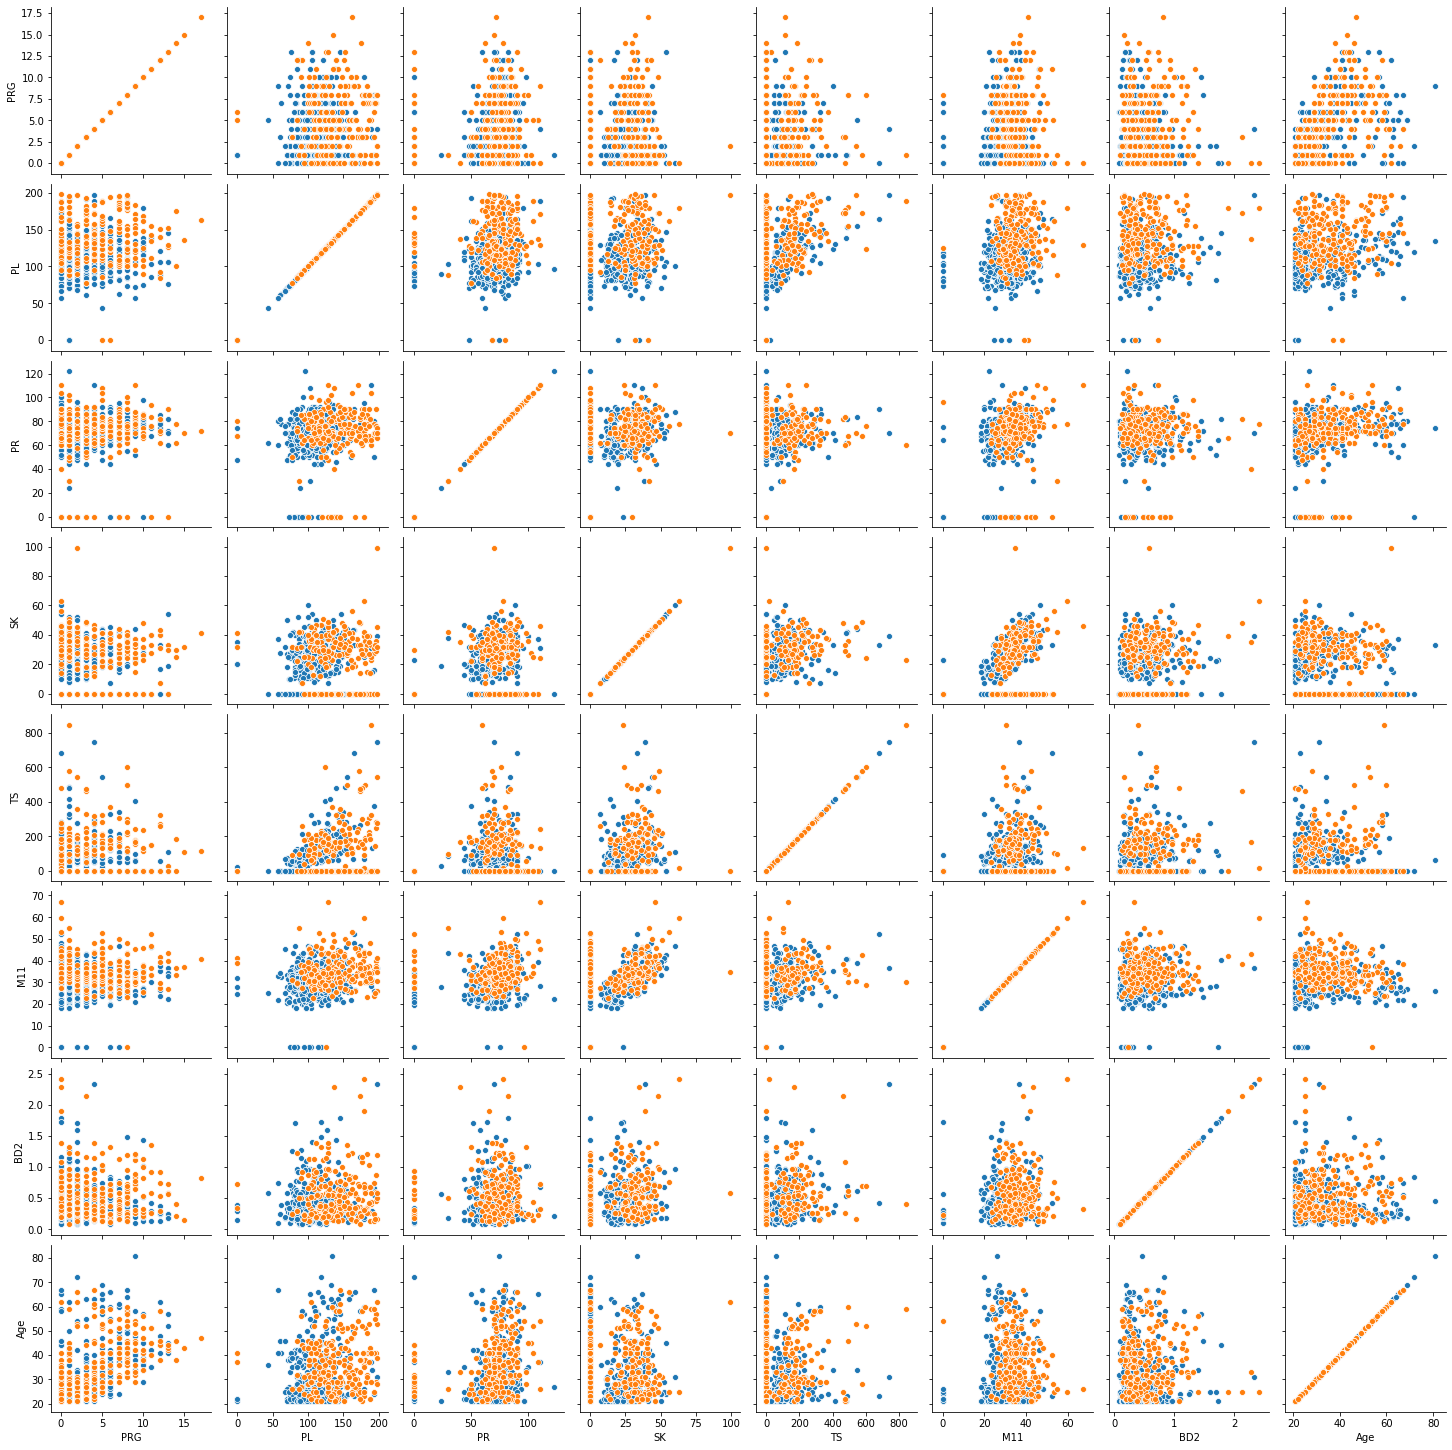

In [10]:
g = sns.PairGrid(PaitientFileTrain, vars=['PRG','PL' , 'PR' , 'SK', 'TS', 
                             'M11', 'BD2', 'Age'], hue="Sepssis")
g.map(sns.scatterplot)
plt.show()

<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 
> - One big indicator is BMI, almost all the positive results are located around the 20 BMI mark.
> - Lower blood pressure 30-40 and extremely high blood pressure 120+ are coming up as positive.
> - Plasma glucose result shows a flat line at around 50-70 plasma glucose level.
> - There is a rough connection between Age vs 1st blood work. Showing a linear growth as age increases the 1st blood work is able to pick up Sepssis much quicker compared to younger ages where its spread across blood work 2,3,4.



<span style="font-size:1.5em;">�</span> What observations did you make?

Since we have discussed this in class, I will leave this as an exercise for you. Discuss with the lab demonstrator in class.

The class distribution to see the percentage of the patients with Sepssis and notice almost double the people don't have Sepssis.

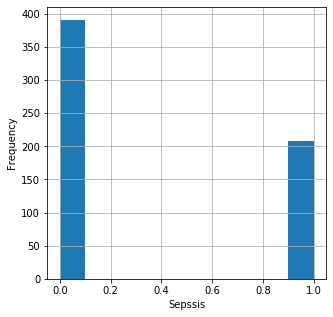

In [11]:
dt = PaitientFileTrain['Sepssis'].astype(int)
dt.hist(figsize=(5,5))
plt.xlabel('Sepssis')
plt.ylabel('Frequency')
plt.show()

Turning 'Sepssis' to Integer to make data splitting and regularised polynomial logistic regression easier and more efficent.

In [12]:
PaitientFileTrain['Sepssis'] =  (PaitientFileTrain['Sepssis']).astype(np.bool)
print(set((PaitientFileTrain['Sepssis']).astype(np.int)))

{0, 1}


## Data splitting and Performance measure

> Using both Hold-out & K-Fold Cross Validation as we have a small dataset and also the test data is provided separately. I have decided to go with a 90/10 split for Train and Validation Data as we only have 599 data points.

> I will select `average=macro` & `f1_score` as my performance measure and my target value is 70% f1_score.


In [13]:
from sklearn.model_selection import train_test_split
    
with pd.option_context('mode.chained_assignment', None):
    train_data, val_data = train_test_split(PaitientFileTrain, test_size=0.1, 
                                            shuffle=True,random_state=0)
    
print(train_data.shape[0], val_data.shape[0])

539 60


In [14]:
#Converting train & val data to np array
train_X = train_data.drop(['Sepssis',], axis=1).to_numpy()
train_y = train_data[['Sepssis']].to_numpy()

val_X = val_data.drop(['Sepssis',], axis=1).to_numpy()
val_y = val_data[['Sepssis']].to_numpy()

In [15]:
from sklearn.metrics import f1_score

def get_f1_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro')
    
    return train_f1, val_f1

### Regularised Polynomial logistic regression 

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
poly.fit(train_X)
train_X = poly.transform(train_X)
val_X = poly.transform(val_X)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty='none', solver='saga', 
                         max_iter=8000, 
                         class_weight='balanced').fit(train_X, train_y.ravel())

train_f1, val_f1 = get_f1_scores(clf, train_X, train_y, val_X, val_y)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.824
Validation F1-Score score: 0.698


#### Regularisation

In [19]:
lambda_paras = np.logspace(-5, 1, num=25)    # establish the lambda values to test (grid)

# Then search
train_performace = list()
valid_performace = list()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 7.0/lambda_para, 
                             random_state=0, solver='liblinear', max_iter=1000 , 
                             class_weight='balanced').fit(train_X, train_y.ravel())
    
    train_f1, val_f1 = get_f1_scores(clf, train_X, train_y, val_X, val_y)
    
    train_performace.append(train_f1)
    valid_performace.append(val_f1)

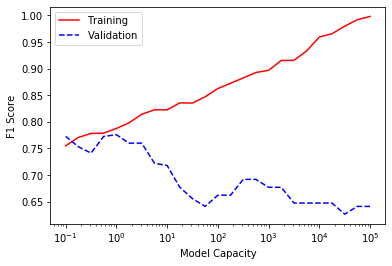

In [20]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

In [21]:
clf = LogisticRegression(penalty='l2', C = 7.0, random_state=0, 
                         solver='liblinear', max_iter=1000, 
                         class_weight='balanced').fit(train_X, train_y.ravel())

train_f1, val_f1 = get_f1_scores(clf, train_X, train_y, val_X, val_y)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.788
Validation F1-Score score: 0.776


### K-Fold Cross Validation, along side the functions to get the performance

In [22]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    train_data, val_data = train_test_split(PaitientFileTrain, test_size=0.1, shuffle=True,random_state=0) 
    
print(train_data.shape[0], val_data.shape[0])

539 60


In [23]:
#Converting train & val data to np array
train_X = train_data.drop(['Sepssis',], axis=1).to_numpy()
train_y = train_data[['Sepssis']].to_numpy()

val_X = val_data.drop(['Sepssis',], axis=1).to_numpy()
val_y = val_data[['Sepssis']].to_numpy()

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2) #adding complexity
poly.fit(train_X)
train_X = poly.transform(train_X)

val_X = poly.transform(val_X)

In [25]:
#Feature scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)


In [26]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer

f1_scorer = make_scorer(f1_score, average='weighted')
lambda_paras = np.logspace(-10, 2, num=5)

cv_results = dict()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 7.0/lambda_para, 
                             solver='liblinear', max_iter=1000, 
                             class_weight='balanced')
    
    scores = cross_validate(clf, train_X, train_y.ravel(), 
                            scoring=f1_scorer, return_estimator=True,
                            return_train_score=True, cv=5)
    
    cv_results[lambda_para] = scores

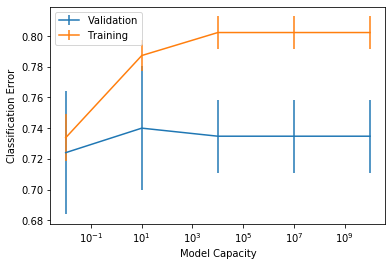

In [27]:
fig, ax = plt.subplots()

val_means = [np.mean(cv_results[lambda_para]['test_score']) 
             for lambda_para in lambda_paras]

val_std = [np.std(cv_results[lambda_para]['test_score']) 
           for lambda_para in lambda_paras]

train_means = [np.mean(cv_results[lambda_para]['train_score']) 
               for lambda_para in lambda_paras]

train_std = [np.std(cv_results[lambda_para]['train_score']) 
             for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()

## Testing the hypothesis (or model)

My ultimate judgement is that with half of the attributes being blood work and many missing, it is difficult to get the most accurate model to predict Sepssis I picked the lambda value of 7 when regularisation occurs as it give my val_data the biggest jump. I tried many max_iter=8000 as that give a convergenceWarning and also allowed the dataset to be clearly have LogisticRegression applied to it. Final validation score was 77.6%

In [37]:
test_data = pd.read_csv('./Paitients_Files_Test.csv', delimiter=',')

del test_data['ID']
del test_data['Insurance']

testdf = pd.DataFrame(test_data)
testdf['Sepssis'] = " "

with pd.option_context('mode.chained_assignment', None):
    train_data_, test_data = train_test_split(test_data, test_size=1, 
                                              shuffle=True,random_state=0)
test_X = test_data.drop(['Sepssis',], axis=1).to_numpy()
test_y = test_data[['Sepssis']].to_numpy()
    
test_X = poly.transform(test_X)
test_X = scaler.transform(test_X)

In [40]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty='none', solver='saga', 
                         max_iter=8000, 
                         class_weight='balanced').fit(test_X, test_y.ravel())

train_f1, test_f1 = get_f1_scores(clf, train_X, train_y, test_X, test_y)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Test F1-Score score: {:.3f}".format(test_f1))

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: ' '

In [36]:
from sklearn.metrics import classification_report

test_pred = clf.predict(test_X)
    
print(classification_report(test_y, test_pred,))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Final Conclusion

After going through all of the visualisation techniques and the two different models (Hold-out validation and K-fold Cross model) I believe that with the limited amount of data and the limited amount of attributes it's extremely difficult to make a 80%+ accurate model that will predict Sepssis. I believe things such as the Sepssis symptoms should also be collected and when they were present and the time frame of the patient visiting the hospital or doctor may also help. e.g Patient 1 showing symtoms has a higher chance of developing sepssis compared to Patient 2 who isn't displaying them. Over all the classification problem worked best with the lambda value of 7, i also experimented with floats (6.75, 5, 8). 

Note: I was unable to figure out how to run the model on the unseen data even after watching all the labs and lectures I left my code there with the errors to show my attempt. If possible could I please recieve feedback on how exactly I would go about this.